# Uber Fare / Cab Fare Prediction

In [1]:
## importing the important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
## loading the data set 
dataset_uber = pd.read_csv("uber.csv")
df = dataset_uber.copy()
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194.0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199.0,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355.0,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730.0,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152.0,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [3]:
df.columns.size

9

In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24999 non-null  float64
 1   key                24999 non-null  object 
 2   fare_amount        24999 non-null  float64
 3   pickup_datetime    24999 non-null  object 
 4   pickup_longitude   24999 non-null  float64
 5   pickup_latitude    24999 non-null  float64
 6   dropoff_longitude  24999 non-null  float64
 7   dropoff_latitude   24999 non-null  float64
 8   passenger_count    24999 non-null  float64
dtypes: float64(7), object(2)
memory usage: 13.7+ MB


In [6]:
## The columns Unnamed: 0 and key were dropped because they are index/identifier fields and have 
## no statistical or predictive relationship with the target variable

In [7]:
df.drop(['Unnamed: 0', 'key'] , axis= 1, inplace= True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
df.isnull().sum()

fare_amount          175001
pickup_datetime      175001
pickup_longitude     175001
pickup_latitude      175001
dropoff_longitude    175001
dropoff_latitude     175001
passenger_count      175001
dtype: int64

In [9]:
df[df.isnull().any(axis= 1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
199995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
##  it is clearly visible that all the feacture have are null so we are going to drop the whole row 
df = df.dropna().reset_index(drop= True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.duplicated().sum() ## there is no duplicate data avillable in thhe dataset 

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        24999 non-null  float64
 1   pickup_datetime    24999 non-null  object 
 2   pickup_longitude   24999 non-null  float64
 3   pickup_latitude    24999 non-null  float64
 4   dropoff_longitude  24999 non-null  float64
 5   dropoff_latitude   24999 non-null  float64
 6   passenger_count    24999 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.3+ MB


In [13]:
## change the data type of the  pickup_datetime	feacture  from obj to datetime so that we can change 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0


In [16]:
## now time to convert the datetime into different colms like date , month , year , time taken 
df = df.assign(
    hour=df.pickup_datetime.dt.hour,
    day=df.pickup_datetime.dt.day,
    month=df.pickup_datetime.dt.month,
    year=df.pickup_datetime.dt.year,
    dayofweek=df.pickup_datetime.dt.dayofweek
)

In [17]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8,2014,3


In [18]:
## now this feture is useless for us we are going to drop the feature pickup_datetime	
df.drop(["pickup_datetime"] , axis= 1 , inplace=True)

In [19]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8,2014,3


In [20]:
## one of the measure work is how to convert the longitude and latitude into the distance for that we are going to use the  Haversine Formula

In [21]:
from math import *

In [22]:
# Haversine Formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df['distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)


In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8,2014,3,4.475450


In [24]:
## As we calculate the distance of the pickup and drop point we are going to  drop the latitude and longitude of the given table
df.drop(['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',] , axis= 1 , inplace=  True)

In [25]:
df.head() 

,fare_amount,passenger_count,hour,day,month,year,dayofweek,distance_km
0,7.5,1.0,19,7,5,2015,3,1.683323
1,7.7,1.0,20,17,7,2009,4,2.457590
2,12.9,1.0,21,24,8,2009,0,5.036377
3,5.3,3.0,8,26,6,2009,4,1.661683
4,16.0,5.0,17,28,8,2014,3,4.475450


In [26]:
## hold one we will do this again after some toime i need to learn many thing i will do it at my best level


In [27]:
df.to_csv("uber_clean_datasets.csv" , index= False)

## Exploratory Data Analysis (EDA)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      24999 non-null  float64
 1   passenger_count  24999 non-null  float64
 2   hour             24999 non-null  int32  
 3   day              24999 non-null  int32  
 4   month            24999 non-null  int32  
 5   year             24999 non-null  int32  
 6   dayofweek        24999 non-null  int32  
 7   distance_km      24999 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 1.0 MB


## Finding outliers in our dataset

In [29]:
df.fare_amount.min()

0.0

## For finding the outlier i am useing box plot to visualize outliers of each features  

In [64]:
df.columns
col = np.array(['fare_amount',  'hour', 'day', 'month', 'year',
       'dayofweek', 'distance_km'])

Text(0.5, 1.0, 'box plot of each feature ')

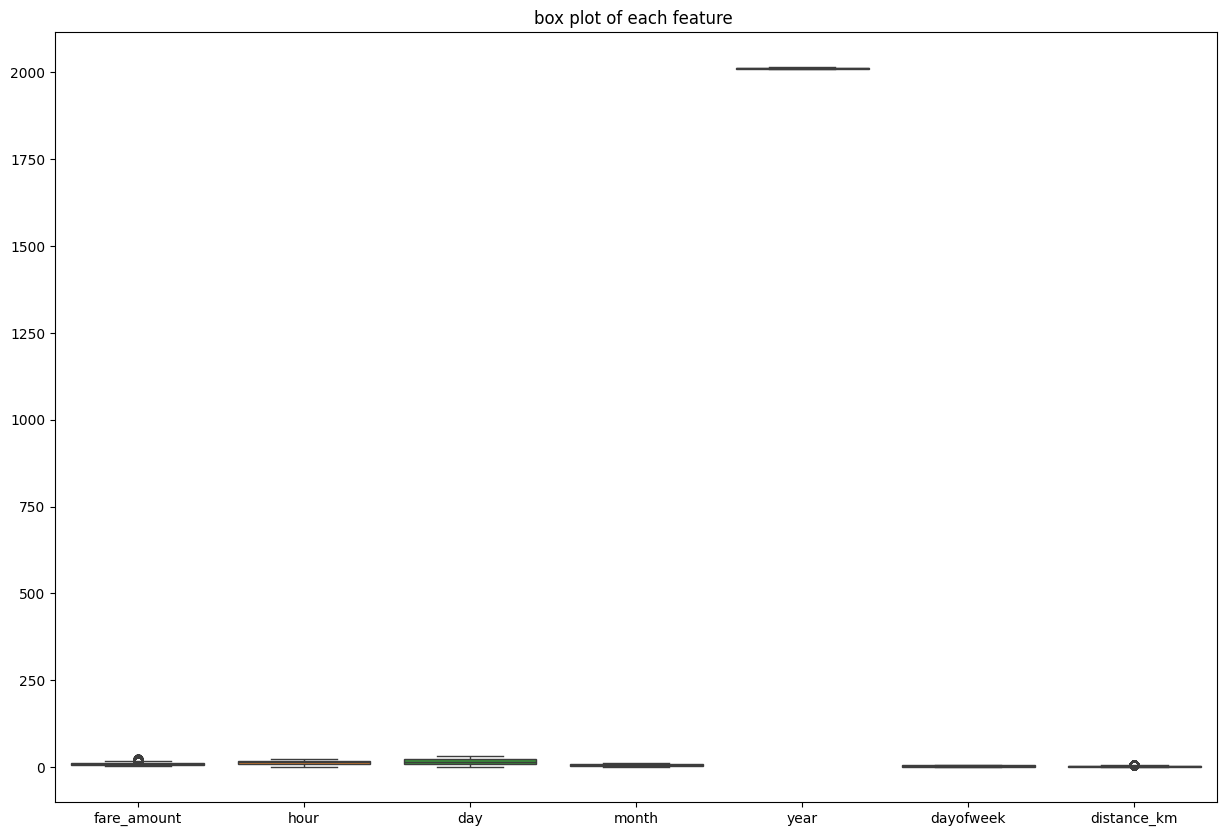

In [65]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = df)
plt.title("box plot of each feature ")

In [66]:
## it is clearly visible that most of the outliers are present at disstance_km feacture
## + fare_amount feature 

In [67]:
df = df[df['fare_amount'] > 1]

In [68]:
print(df["fare_amount"].max())
print(df["distance_km"].max())

22.1
6.482297983169468


In [69]:
## Makeing a function that cheak  outliers and remove 

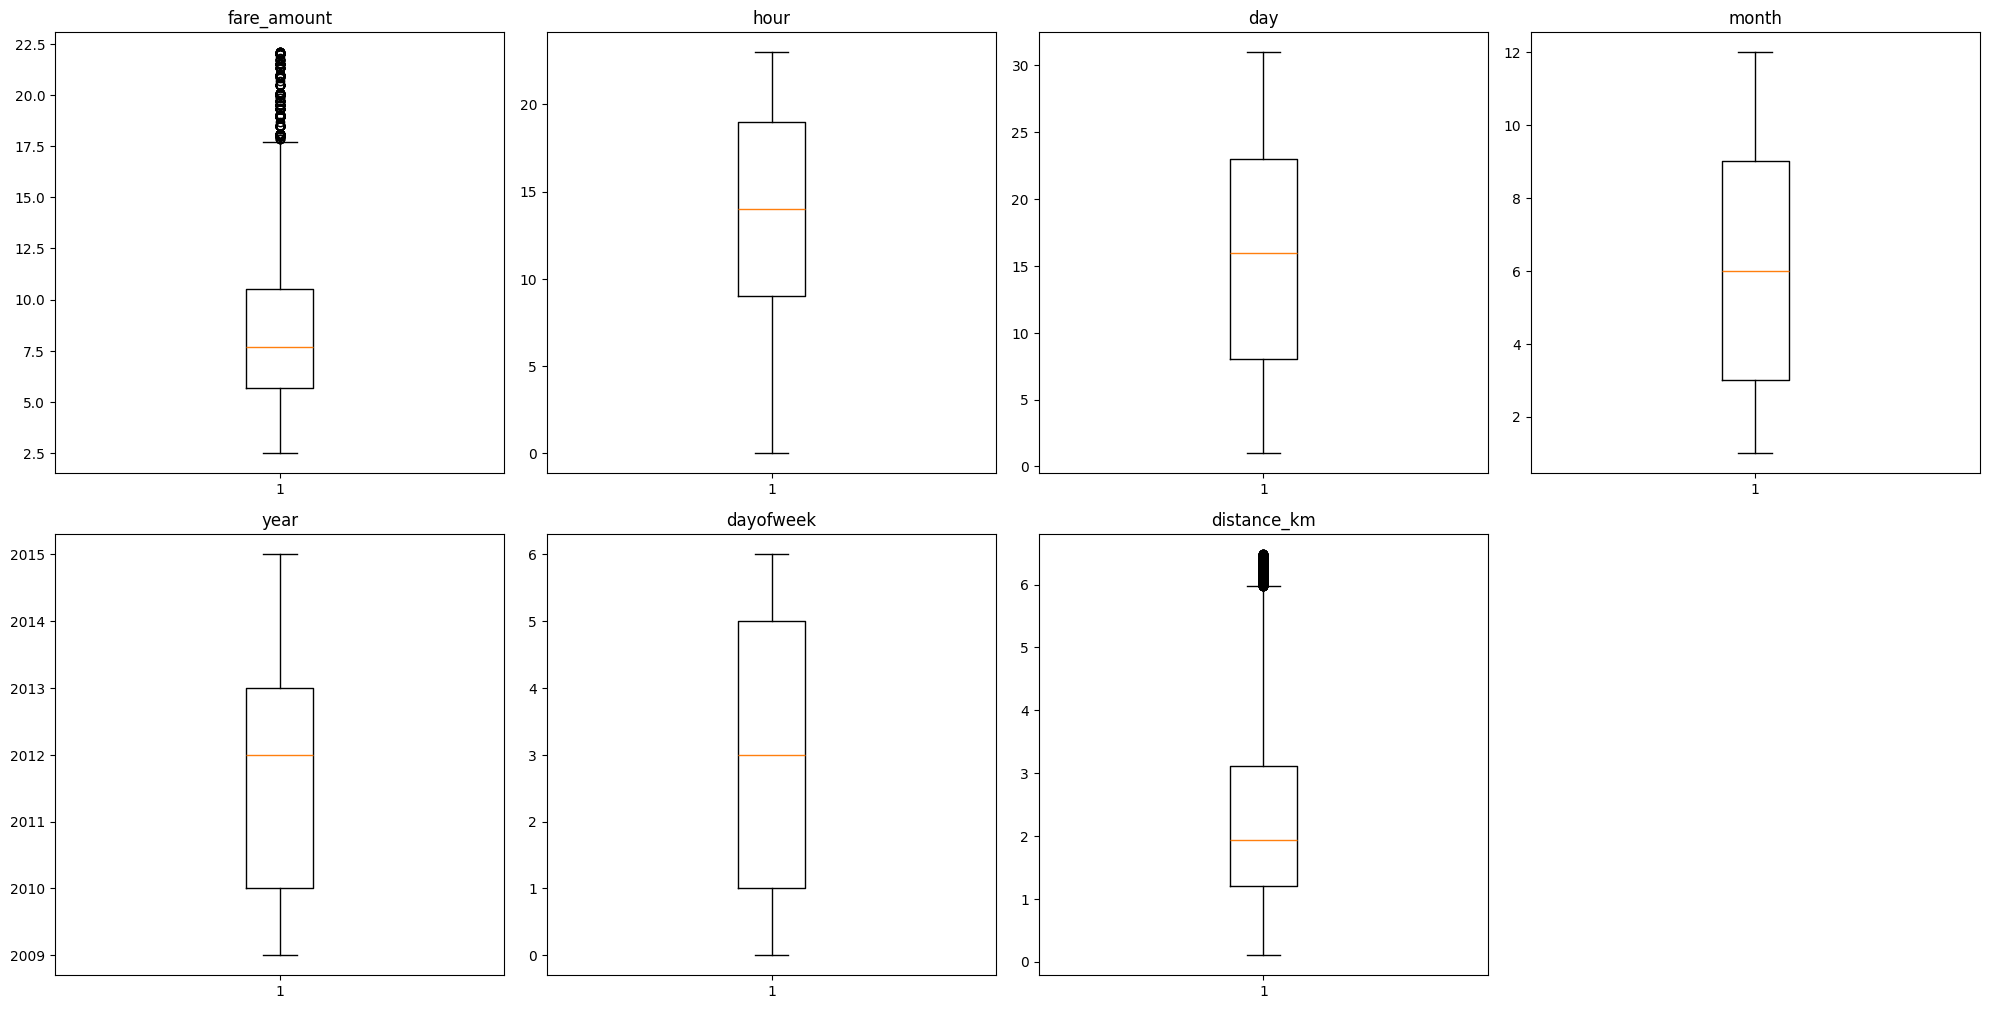

In [70]:
plt.figure(figsize=(20 ,20))
for i , j in enumerate(col):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[j] , whis=1.5)
    plt.tight_layout()
    plt.title(j)

In [71]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

# Apply to both columns
df = remove_outliers_iqr(df, 'fare_amount')
df = remove_outliers_iqr(df, 'distance_km')

print(f"Rows remaining after IQR cleaning: {len(df)}")

Rows remaining after IQR cleaning: 20082


## The outliers are present in :- fare_amount, distance_km , passenger_count so , remove it 

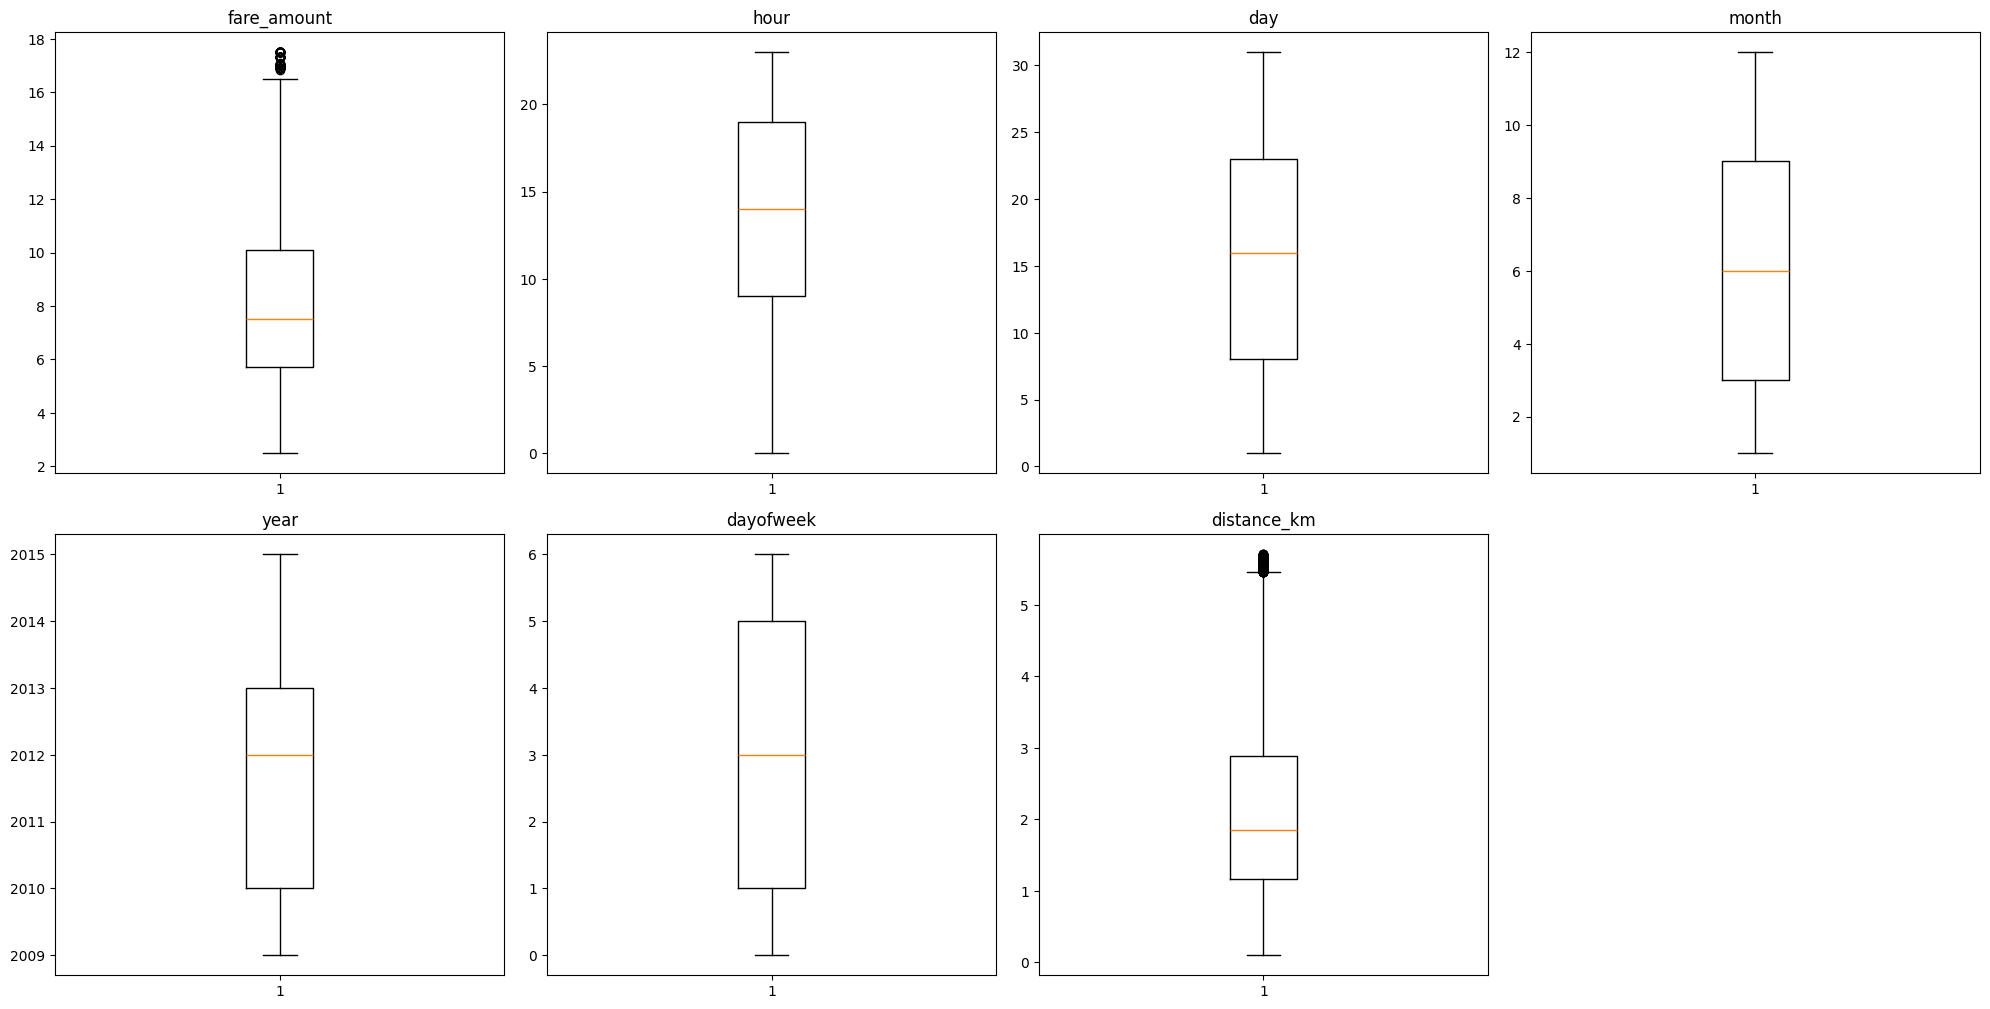

In [72]:

plt.figure(figsize=(20 ,20))
for i , j in enumerate(col):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[j] , whis=1.5)
    plt.tight_layout()
    plt.title(j)

In [104]:
df = df[df['fare_amount'] < 100]
df = df[df['distance_km'] < 50]
df = df[df['distance_km'] > 0.1]
df = df[df['fare_amount'] >= 2.5]
print("Data cleaned logically. Ready for training.")

Data cleaned logically. Ready for training.


In [193]:
# 1. Drop trips with zero or near-zero distance but high fare
df.drop(df[(df['fare_amount'] > 10) & (df['distance_km'] < 1)].index, inplace = True)

# 2. Drop trips with high distance but suspiciously low fare
df.drop(df[(df['fare_amount'] < 6) & (df['distance_km'] > 2.5)].index, inplace = True)

In [194]:
df.columns

Index(['fare_amount', 'hour', 'day', 'month', 'year', 'dayofweek',
       'distance_km'],
      dtype='object')

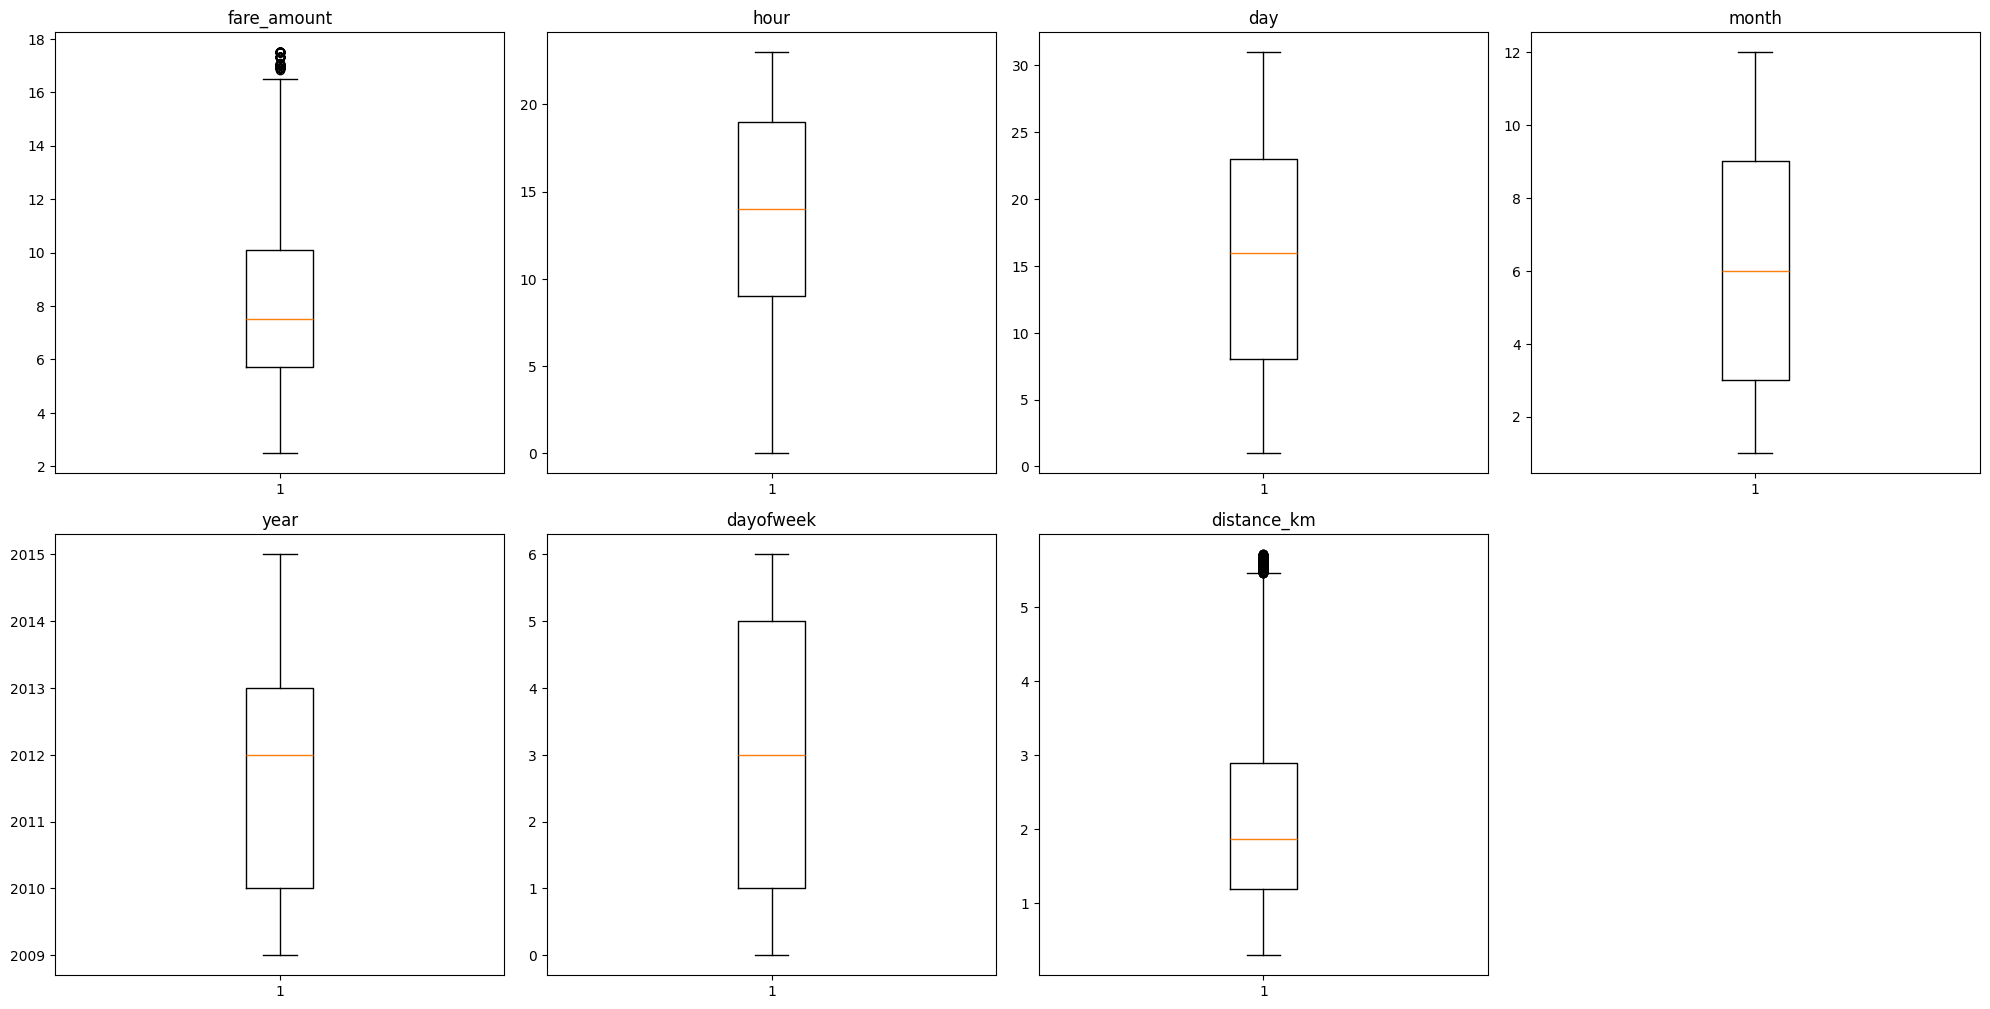

In [195]:
plt.figure(figsize=(20 ,20))
for i , j in enumerate(col):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[j] , whis=1.5)
    plt.tight_layout()
    plt.title(j)

In [196]:
print(df["fare_amount"].max())
print(df["distance_km"].max())

17.5
5.707423171211131


<Axes: xlabel='fare_amount', ylabel='Count'>

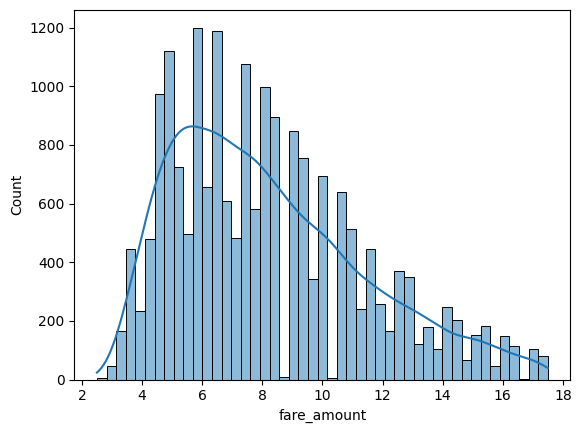

In [197]:
## fair_amount
sns.histplot(data = df["fare_amount"] , kde= True)

## the ploted graph Fare amount is right-skewed indicating more short-distance trips.

<Axes: title={'center': 'Fare vs Distance'}, xlabel='fare_amount', ylabel='distance_km'>

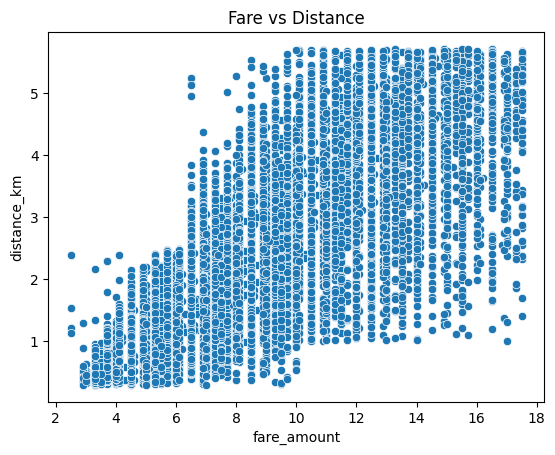

In [198]:
## Fare vs Distance
plt.title("Fare vs Distance")
sns.scatterplot(x = df["fare_amount"] , y = df["distance_km"])

## The ploted graph show that the fair Fare increases almost linearly with distance 

In [199]:
df.head(10)

,fare_amount,hour,day,month,year,dayofweek,distance_km
0,7.5,19,7,5,2015,3,1.683323
1,7.7,20,17,7,2009,4,2.457590
2,12.9,21,24,8,2009,0,5.036377
3,5.3,8,26,6,2009,4,1.661683
4,16.0,17,28,8,2014,3,4.475450
8,9.7,9,17,2,2012,4,2.332711
9,12.5,19,29,3,2012,3,4.889417
10,6.5,17,22,5,2015,4,2.250858
12,3.3,14,17,5,2011,1,0.302252
13,10.9,11,25,6,2011,5,3.581251


## Time-Based Analysis (Peak Hours)

In [200]:
hourly_fare = df.groupby("hour")["fare_amount"].mean() ##  i am groupin this all  23 hours  acc to thee avg of fair_amount given 
print(hourly_fare)

hour
0     8.347402
1     7.967362
2     7.871722
3     8.555903
4     8.223729
5     7.276023
6     7.453663
7     7.788600
8     8.058397
9     8.184728
10    8.202247
11    8.274268
12    8.273187
13    7.969639
14    8.313974
15    8.327641
16    8.081354
17    8.375483
18    8.179204
19    8.259869
20    8.290927
21    8.361140
22    8.259104
23    8.278719
Name: fare_amount, dtype: float64


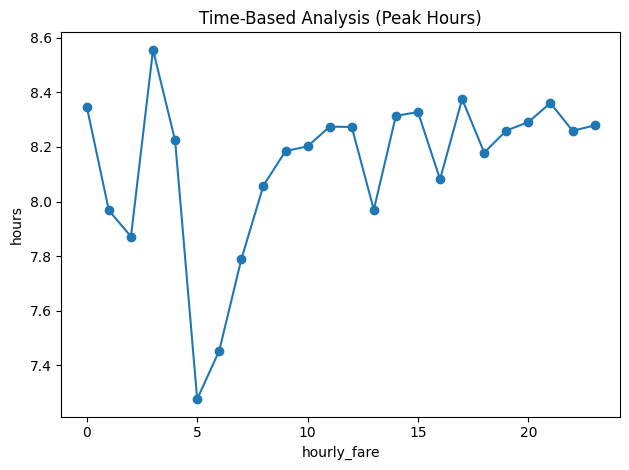

In [201]:
plt.title("Time-Based Analysis (Peak Hours)")
plt.plot(hourly_fare.index, hourly_fare.values, marker="o")
plt.xlabel("hourly_fare")
plt.ylabel("hours")
plt.tight_layout()

In [202]:
corr = df.corr()
corr

,fare_amount,hour,day,month,year,dayofweek,distance_km
fare_amount,1.000000,0.026966,0.013478,0.035313,0.168533,0.011606,0.798209
hour,0.026966,1.000000,0.001094,-0.003022,-0.006267,-0.091945,0.004350
day,0.013478,0.001094,1.000000,-0.016098,-0.010565,0.002857,0.016269
month,0.035313,-0.003022,-0.016098,1.000000,-0.121725,-0.010721,0.005043
year,0.168533,-0.006267,-0.010565,-0.121725,1.000000,0.001833,-0.018833
dayofweek,0.011606,-0.091945,0.002857,-0.010721,0.001833,1.000000,0.039910
distance_km,0.798209,0.004350,0.016269,0.005043,-0.018833,0.039910,1.000000


Text(0.5, 1.0, 'coreation of dataset')

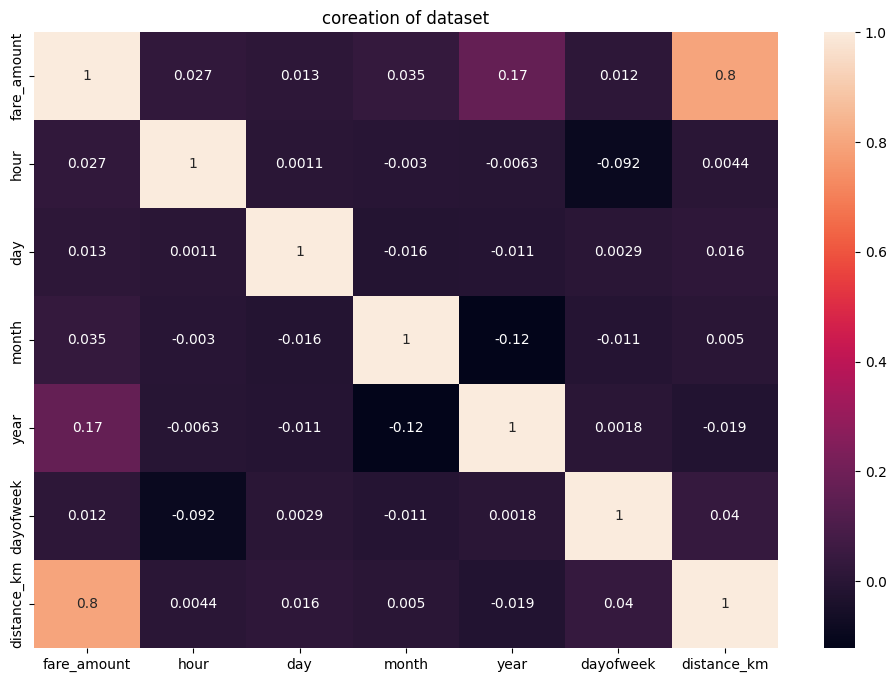

In [203]:
plt.figure(figsize=(12,8))
sns.heatmap(corr , annot= True)
plt.title("coreation of dataset")

In [204]:
df.head(10)

,fare_amount,hour,day,month,year,dayofweek,distance_km
0,7.5,19,7,5,2015,3,1.683323
1,7.7,20,17,7,2009,4,2.457590
2,12.9,21,24,8,2009,0,5.036377
3,5.3,8,26,6,2009,4,1.661683
4,16.0,17,28,8,2014,3,4.475450
8,9.7,9,17,2,2012,4,2.332711
9,12.5,19,29,3,2012,3,4.889417
10,6.5,17,22,5,2015,4,2.250858
12,3.3,14,17,5,2011,1,0.302252
13,10.9,11,25,6,2011,5,3.581251


In [205]:
## conclusion  due to no relation with fair price of trip we are goin to drop the passenger_count

In [206]:
df.head(10)

,fare_amount,hour,day,month,year,dayofweek,distance_km
0,7.5,19,7,5,2015,3,1.683323
1,7.7,20,17,7,2009,4,2.457590
2,12.9,21,24,8,2009,0,5.036377
3,5.3,8,26,6,2009,4,1.661683
4,16.0,17,28,8,2014,3,4.475450
8,9.7,9,17,2,2012,4,2.332711
9,12.5,19,29,3,2012,3,4.889417
10,6.5,17,22,5,2015,4,2.250858
12,3.3,14,17,5,2011,1,0.302252
13,10.9,11,25,6,2011,5,3.581251


In [207]:
df.to_csv("uber_clean_datasets.csv" , index= False)

In [208]:
len(df)

19760